In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Celler

In [55]:
df = pd.read_csv("ntp_alle.csv")
df = df.fillna(0)
pd.set_option('display.max_rows', None)
df["B/K"] = "B"
df["B/K"][df.index > 49] = "K"
df = df.convert_dtypes()
df.dtypes
#df


Sektor             string
Korr.              string
Fylke              string
Tiltak             string
Kategori           string
Stat_22–27          Int64
Stat_28–33          Int64
Bom_andre_22–33     Int64
B/K                string
dtype: object

In [58]:


store = df[df["Kategori"] == "Store prosjekt"]

summ = store["Stat_22–27"] + store["Stat_28–33"]
store["SumStat"] = summ
store

,Sektor,Korr.,Fylke,Tiltak,Kategori,Stat_22–27,Stat_28–33,Bom_andre_22–33,B/K,SumStat
52,Vei,1,Viken,Rv. 22 Glommakryssing,Store prosjekt,795,572,1585,K,1367
53,Vei,2,Viken,E18 Retvet–Vinterbro,Store prosjekt,1772,3000,2693,K,4772
58,Vei,3,Viken,Rv. 19 Moss,Store prosjekt,400,2600,2000,K,3000
59,Vei,3,Viken,Rv. 282 Holmenbrua,Store prosjekt,453,0,453,K,453
60,Vei,3,Rogaland,E39 Ålgård–Hove,Store prosjekt,230,1529,2134,K,1759
61,Vei,3,Viken,E134 Dagslett–E18,Store prosjekt,567,1420,1824,K,1987
62,Vei,3,Agder,E18/E39 Gartnerløkka–Kolsdalen,Store prosjekt,1320,0,1990,K,1320
64,Vei,3,Viken,"E134 Oslofjordforbindelsen, byggetrinn 2",Store prosjekt,1739,0,3092,K,1739
65,Vei,3,Rogaland,Rv. 509 Kontinentalveien–Sundekrossen,Store prosjekt,0,0,239,K,0
70,Vei,4,Vestland,E39 Ådland–Svegatjørn (Hordfast),Store prosjekt,1000,22322,14400,K,23322


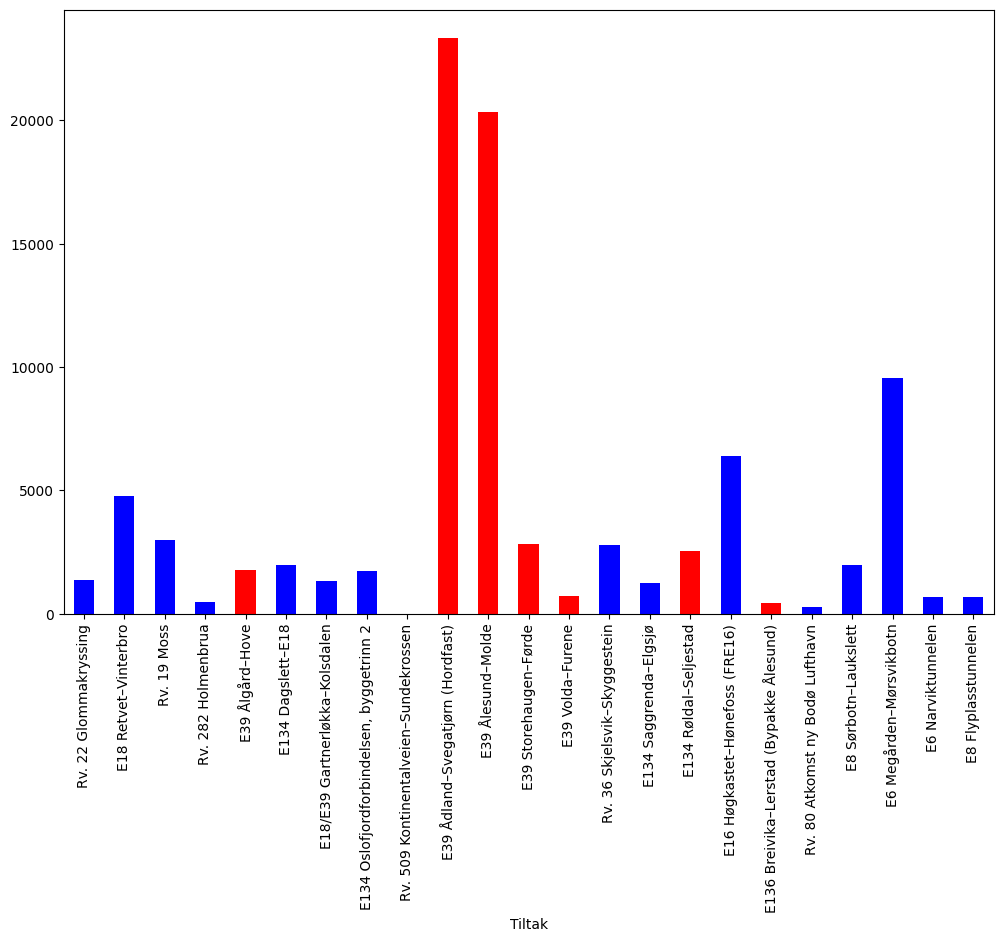

In [59]:
store["SumStat"] = summ
store["color"] = "b"
store["color"][store["Fylke"].isin(["Vestland", "Rogaland", "Møre og Romsdal"])] = "r"

plotdata = pd.DataFrame({"Stat": store["SumStat"].values}, index=store["Tiltak"])
ax = plotdata["Stat"].plot(kind="bar", color=store["color"])




Text(0.5, 1.0, 'Bompengeandel store prosjekter')

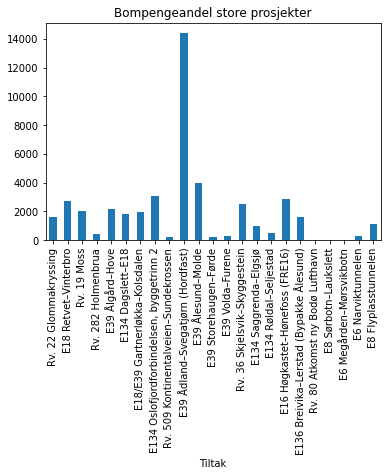

In [47]:
plotdata = pd.DataFrame({"Bom": store["Bom_andre_22–33"].values}, index=store["Tiltak"])
ax = plotdata["Stat"].plot(kind="bar")
plt.title("Bompengeandel store prosjekter")

# Kombinert Stat og bompenge

Text(0.5, 1.0, 'Stat + Bom')

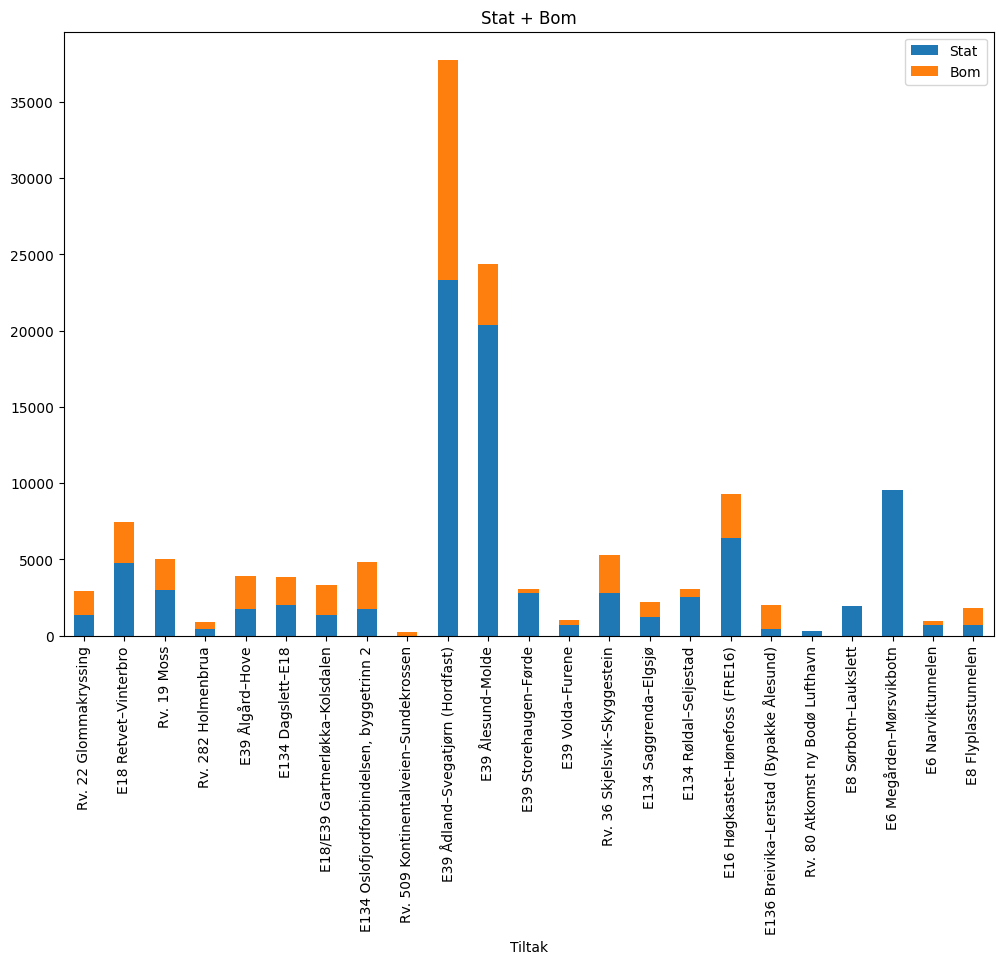

In [87]:
plotdata = pd.DataFrame({"Stat": store["SumStat"].values, "Bom": store["Bom_andre_22–33"].values}, index=store["Tiltak"])
ax = plotdata[["Stat", "Bom"]].plot(kind="bar", stacked=True)
plt.title("Stat + Bom")

In [74]:
summ = df["Stat_22–27"] + df["Stat_28–33"]
df["Stat"] = summ
alle = df[df["Sektor"] != "Sum"]
#df["Stat"].plot(kind="bar")

<AxesSubplot:xlabel='Tiltak'>

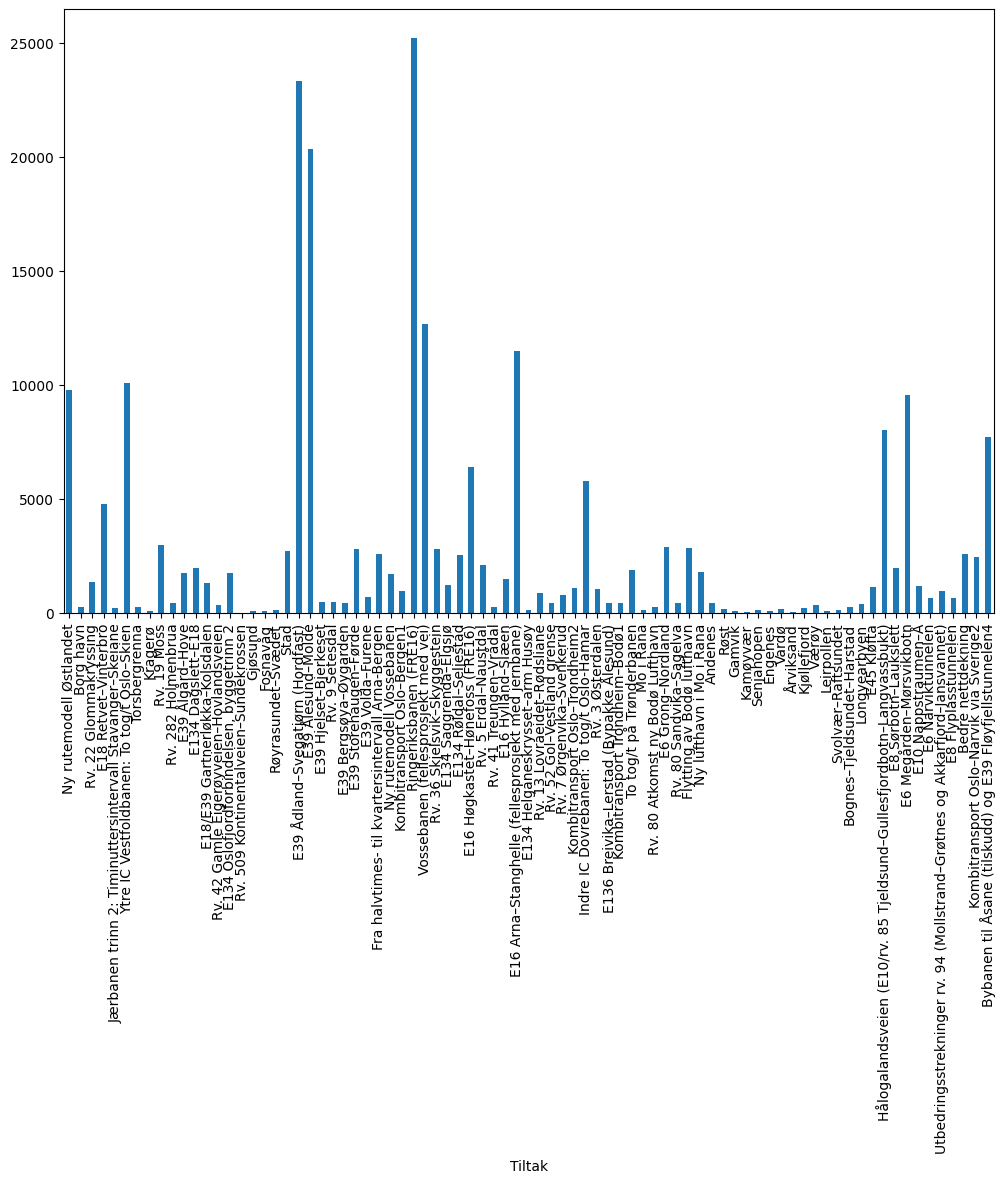

In [78]:
alle["Stat"].plot(kind="bar")
plotdata = pd.DataFrame({"Stat": alle["Stat"].values}, index=alle["Tiltak"])
plotdata["Stat"].plot(kind="bar")

In [86]:
gruppert = alle.groupby("Sektor")
for grp, frame in gruppert:
    print(frame)


   Sektor Korr.                 Fylke  \
0   Jbane     0                 Flere   
4   Jbane     3              Rogaland   
5   Jbane     3  Vestfold og Telemark   
27  Jbane     5              Vestland   
28  Jbane     5              Vestland   
29  Jbane     5                 Flere   
30  Jbane     5                 Viken   
31  Jbane     5              Vestland   
44  Jbane     6                 Flere   
45  Jbane     6             Innlandet   
48  Jbane     7   Nordland, Trøndelag   
49  Jbane     7             Trøndelag   
78  Jbane    U3                 Flere   
79  Jbane    U3                 Flere   

                                               Tiltak               Kategori  \
0                             Ny rutemodell Østlandet       Nye effektpakker   
4   Jærbanen trinn 2: Timinuttersintervall Stavang...       Nye effektpakker   
5          Ytre IC Vestfoldbanen: To tog/t Oslo–Skien       Nye effektpakker   
27   Fra halvtimes- til kvartersintervall Arna-Bergen  Fullføre 